#Edición de Imágenes con IA: Image-to-Image con Stable Diffusion

##Descripción
En este trabajo, se podra ver una de las capacidades más fascinantes de los modelos de difusión: la traducción de imagen a imagen (Image-to-Image). A diferencia de la generación a partir de ruido puro, en esta tarea se proporcionará una imagen de entrada (como un boceto, un dibujo simple o una foto) junto con un prompt de texto. El modelo utilizará la composición y las formas de tu imagen como base, pero la transformará para que coincida con el estilo y el contenido descrito en el prompt.

#1. Instalación y Configuración


In [1]:
# Instalar las librerías necesarias
!pip install diffusers transformers accelerate safetensors -q

# necesario para trabajar con tensores y modelos de aprendizaje profundo
import torch # Framework central para la computación numérica en GPU y CPU

# Permite generar imágenes modificadas a partir de una imagen base y un prompt de texto
from diffusers import StableDiffusionImg2ImgPipeline

# Biblioteca para abrir, modificar y guardar imágenes en múltiples formatos
from PIL import Image

# Se usa para realizar solicitudes HTTP, útil al obtener imágenes desde la web
import requests

# BytesIO permite manejar imágenes descargadas como objetos en memoria, sin necesidad de guardarlas en disco
from io import BytesIO # Convierte datos binarios descargados en objetos similares a archivos para su uso con PIL

# Biblioteca de visualización para mostrar la imagen original y las generadas en un entorno gráfico
import matplotlib.pyplot as plt

print("Librerías instaladas y listas.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.0 MB/s eta 0:00:00
Librerías instaladas y listas.


#2. cargar el pipeline Image-to-Image
Cargaremos un modelo pre-entrenado en un pipeline especializado para la tarea de imagen a imagen.

In [2]:
# ID del modelo y carga del pipeline
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16) # Usamos dtype de 16 bits para reducir el uso de memoria y acelerar inferencia en GPU,
# Usamos el ID del modelo para descargarlo desde Hugging Face

# Mover el pipeline a la GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

print(f"Pipeline Img2Img cargado y movido al dispositivo: {device}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Pipeline Img2Img cargado y movido al dispositivo: cuda


#3. Cargar y preparar la Imagen de entrada
Para este trabajo, descargaremos un boceto simple de un paisaje desde una URL.

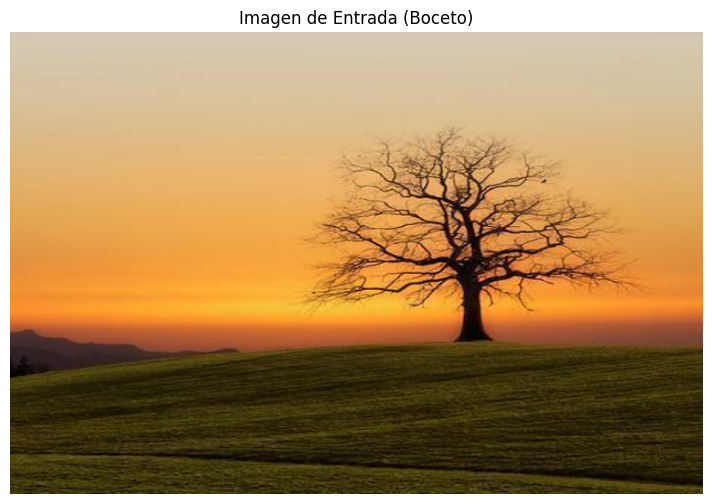

In [3]:
# URL de una imagen de boceto simple
url = "https://posterjack.com/cdn/shop/articles/landscape_photography_tips_featured_image_455x455_da573899-5e4d-4cac-9e77-269882a1dcdd.jpg?v=1563421852&width=2048"

# Descargar y abrir la imagen
response = requests.get(url)  # Realiza la solicitud HTTP para obtener el contenido de la imagen desde la URL
init_image = Image.open(BytesIO(response.content)).convert("RGB") # Convierte la respuesta binaria en imagen RGB con la biblioteca PIL

# Redimensionar la imagen a un tamaño compatible
init_image = init_image.resize((768, 512)) # Ajusta el tamaño de la imagen a las dimensiones recomendadas por Stable Diffusion

# Mostrar la imagen de entrada
plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico en pulgadas
plt.imshow(init_image) # Muestra la imagen en el notebook
plt.title("Imagen de Entrada (Boceto)") # Agrega un título descriptivo
plt.axis('off') # Oculta los ejes para una vista más limpia
plt.show() # Renderiza el gráfico

#4. la primera transformación – Boceto a Realidad
Ahora, vamos a darle un prompt al modelo para que “coloree” y complete nuestro boceto.

  0%|          | 0/47 [00:00<?, ?it/s]

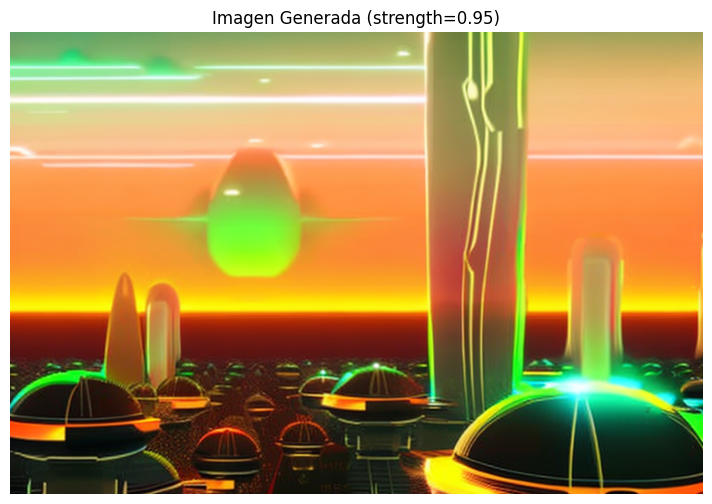

In [17]:
# Definir el prompt que describe el resultado deseado
prompt = "A futuristic alien cityscape with glowing neon skyscrapers featuring advanced architecture, flying cars in the sky, bioluminescent plants replacing trees, surreal atmosphere, cinematic, ultra-detailed, science fiction concept art."
# Este texto es la guía creativa para el modelo. Estás solicitando un paisaje urbano alienígena futurista,
# con rascacielos de neón resplandeciente y arquitectura avanzada.
# El modelo usará esto para reinterpretar los elementos del boceto.

# Usar una semilla para resultados reproducibles
generator = torch.Generator(device=device).manual_seed(1024)
# La semilla 1024 asegura que cada vez que ejecutes este bloque con los mismos parámetros obtendrás la misma imagen.

# Generar la imagen. 'strength' controla cuánto se altera la imagen original.
# Un valor más alto significa más cambio.
output = pipe(
    prompt=prompt,              # Texto guía para la transformación
    image=init_image,           # Imagen de entrada (el boceto)
    strength=0.95,              # Controla cuánto se modifica la imagen (0 = casi igual, 1 = casi todo nuevo)
    guidance_scale=8.0,         # Qué tanto se debe seguir el prompt textual (más alto = más fiel al texto)
    generator=generator         # Semilla para reproducibilidad
)
image = output.images[0]       # Extraemos la imagen resultante del objeto output

# Mostrar la imagen generada
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title("Imagen Generada (strength=0.95)")
plt.axis('off')
plt.show()

#5. Experimentando con el parámetro strength
El parámetro strength es clave en Image-to-Image. Veamos cómo diferentes valores afectan el resultado, manteniendo el mismo prompt y la misma semilla

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

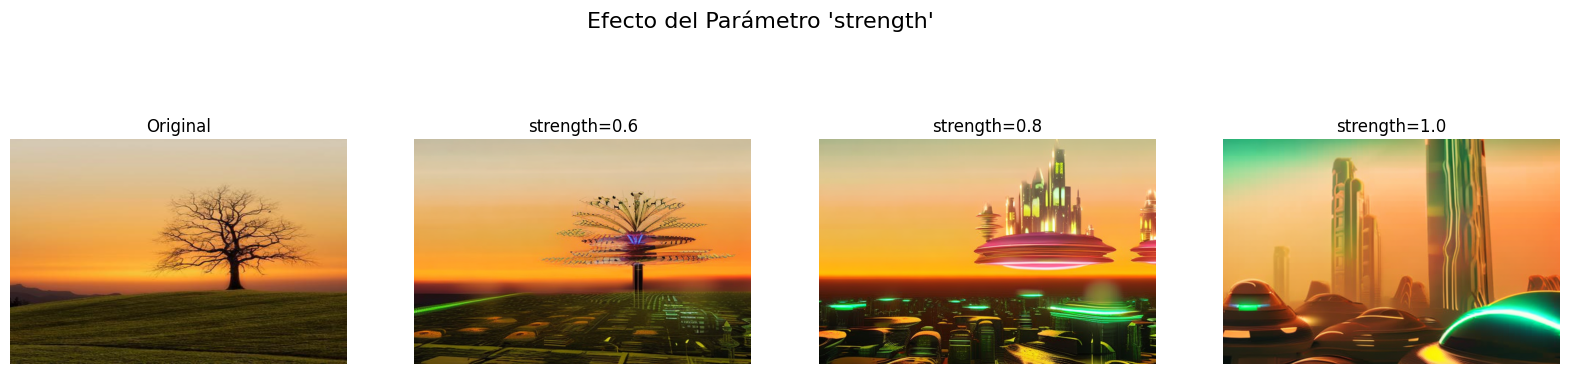

In [24]:
# Lista de valores de strength para probar
strengths = [0.6, 0.8, 1.0] # Lista de valores que definen el grado de modificación de la imagen
generated_images = [] # Aquí almacenamos cada imagen generada para compararlas luego

for s in strengths:
    generator = torch.Generator(device=device).manual_seed(1024) # Semilla fija para que las transformaciones sean reproducibles
    result_image = pipe(prompt=prompt, image=init_image, strength=s, guidance_scale=7.5, generator=generator).images[0]
    # Generas la imagen con el valor actual de strength y la agregas a la lista
    generated_images.append(result_image)

# Crear una visualización comparativa
fig, axs = plt.subplots(1, len(strengths) + 1, figsize=(20, 5)) # Configuras la visualización con subgráficos para comparar lado a lado
fig.suptitle("Efecto del Parámetro 'strength'", fontsize=16)

# Mostrar la imagen original
axs[0].imshow(init_image)  # Muestra el boceto original
axs[0].set_title("Original")
axs[0].axis('off')

# Mostrar las imágenes generadas
for i, s in enumerate(strengths): # Itera por cada imagen generada y la muestra con su respectivo título
    axs[i+1].imshow(generated_images[i])
    axs[i+1].set_title(f"strength={s}")
    axs[i+1].axis('off')

plt.show()

#Resultados
- Persistencia del atardecer: Aunque el prompt original no especifica hora, el fondo se mantiene constante, lo que da coherencia visual pero limita la variación atmosférica.

- Gradualidad estructural: El paso de un solo objeto (0.6) a una ciudad completa (1.0) muestra cómo el modelo interpreta la escala y complejidad del concepto.

- Bioluminiscencia: No es explícita, pero podría estar sugerida en los colores y texturas de las plantas o estructuras en 0.8 y 1.0.

- Surrealismo y detalle: A partir de 0.8 se nota una clara intención de cumplir con el estilo “cinematic, ultra-detailed”.

#6. Análisis del trabajo: Image-to-Image con Stable Diffusion
Este proyecto explora con éxito el poder transformador de los modelos de difusión en la modalidad Image-to-Image, permitiendo reinterpretar visualmente un boceto mediante lenguaje natural. Cada etapa del pipeline demuestra comprensión técnica y sensibilidad creativa.

##Instalación y Configuración
Se estableció un entorno funcional con las librerías esenciales: diffusers, transformers, accelerate y safetensors. La correcta asignación del modelo al dispositivo CUDA garantiza eficiencia y rendimiento en la generación.
##Carga de Imagen Base
Se utilizó un boceto con un fondo natural como entrada. La imagen fue procesada y redimensionada apropiadamente, asegurando compatibilidad con el modelo y claridad en las comparaciones visuales posteriores.
##Transformación Mediante Prompt
El prompt inicial (“A futuristic alien cityscape with glowing neon...”) logró guiar eficazmente al modelo hacia una reinterpretación rica y estilizada, mostrando cómo texto y imagen pueden combinarse para generar arte complejo y expresivo.

#Conclusión
Este laboratorio muestra cómo la IA generativa no solo crea desde cero, sino que también puede ser una poderosa herramienta de colaboración y edición, transformando nuestras ideas iniciales en obras de arte detalladas.



In [33]:
import nbformat

notebook_path = "Image_To_Image_con_Stable_Diffusion.ipynb"

# Cargar el notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=nbformat.NO_CONVERT)

# Eliminar metadata.widgets a nivel notebook
if "widgets" in nb.metadata:
    del nb.metadata["widgets"]
    print("Se eliminó 'metadata.widgets' del notebook.")

# Eliminar metadata.widgets en cada celda
for i, cell in enumerate(nb.cells):
    if "metadata" in cell and "widgets" in cell.metadata:
        del cell.metadata["widgets"]
        print(f"Se eliminó 'metadata.widgets' en la celda {i}.")

# Guardar el notebook limpio
with open(notebook_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("Notebook guardado sin metadatos corruptos en celdas.")

Notebook guardado sin metadatos corruptos en celdas.
